In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

NAME_FILE = '../name_mapping.json'
f = open(NAME_FILE)
name_data = json.load(f)

In [3]:
SYMBOL_DIGIT_SUBSTITUTION_CSV = '../data/symbol_digit_substitution.csv'
data = pd.read_csv(SYMBOL_DIGIT_SUBSTITUTION_CSV)

In [4]:
renamed_data = data.rename(columns=name_data)
renamed_data

,subject_id,Correct Digits matched,Digit Match attempts
0,1000085,22.0,22.0
1,1000158,5.0,17.0
2,1000251,23.0,24.0
3,1000279,25.0,25.0
4,1000295,21.0,21.0
...,...,...,...
118443,6024683,18.0,20.0
118444,6024769,12.0,13.0
118445,6024781,25.0,25.0
118446,6024822,24.0,24.0


In [5]:
# renamed_data.to_csv('../processed_data/symbol_digit_substitution.csv', index=False)

In [6]:
renamed_data[renamed_data['Correct Digits matched']==1.0]

,subject_id,Correct Digits matched,Digit Match attempts
962,1040307,1.0,8.0
1332,1055691,1.0,11.0
1376,1057361,1.0,5.0
2042,1085805,1.0,9.0
2477,1103783,1.0,16.0
...,...,...,...
116299,5933259,1.0,11.0
117233,5973047,1.0,3.0
117704,5993424,1.0,10.0
118006,6006608,1.0,3.0


In [7]:
correct_match = renamed_data['Correct Digits matched']
print(f"On average, participants got {correct_match.mean()} matches correct")
print(f"At max, participants got {correct_match.max()} matches correct")
print(f"At least, participants got {correct_match.min()} matches correct")

On average, participants got 19.67642340942861 matches correct
At max, participants got 103.0 matches correct
At least, participants got 0.0 matches correct


In [8]:
match_attempt = renamed_data['Digit Match attempts']
print(f"On average, participants got {match_attempt.mean()} matches correct")
print(f"At max, participants attempted {match_attempt.max()} matches")
print(f"At least, participants attempted {match_attempt.min()} matches")

On average, participants got 20.26410745643658 matches correct
At max, participants attempted 109.0 matches
At least, participants attempted 1.0 matches


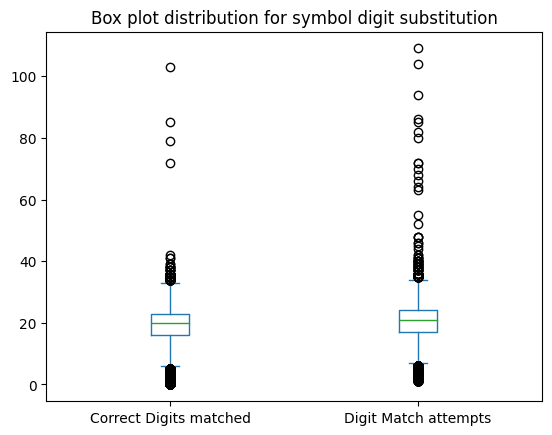

In [9]:
renamed_data[['Correct Digits matched', 'Digit Match attempts']].plot.box()
plt.title('Box plot distribution for symbol digit substitution')
plt.show()

In [10]:
top_attempts = renamed_data['Digit Match attempts'].sort_values(ascending=False)[:10]
renamed_data[renamed_data['Digit Match attempts'].isin(top_attempts)]

,subject_id,Correct Digits matched,Digit Match attempts
911,1038134,21.0,70.0
7992,1335949,8.0,72.0
28949,2223651,103.0,109.0
49950,3101150,79.0,80.0
63675,3687949,9.0,94.0
70376,3977258,16.0,86.0
75808,4205954,8.0,104.0
81239,4436583,13.0,82.0
92496,4916950,85.0,85.0
111799,5740470,72.0,72.0


In [11]:
renamed_data['SBS_accuracy'] = renamed_data['Correct Digits matched']/renamed_data['Digit Match attempts']

In [12]:
renamed_data

,subject_id,Correct Digits matched,Digit Match attempts,SBS_accuracy
0,1000085,22.0,22.0,1.000000
1,1000158,5.0,17.0,0.294118
2,1000251,23.0,24.0,0.958333
3,1000279,25.0,25.0,1.000000
4,1000295,21.0,21.0,1.000000
...,...,...,...,...
118443,6024683,18.0,20.0,0.900000
118444,6024769,12.0,13.0,0.923077
118445,6024781,25.0,25.0,1.000000
118446,6024822,24.0,24.0,1.000000


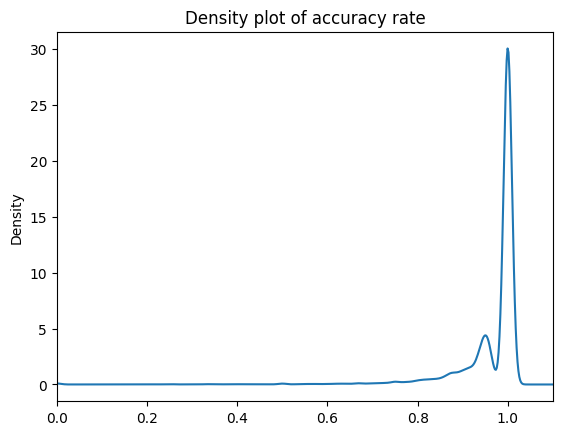

In [13]:
renamed_data['SBS_accuracy'].plot.density()
plt.xlim(0, 1.1)
plt.title('Density plot of accuracy rate')
plt.show()

In [14]:
renamed_data[renamed_data['SBS_accuracy'].isin(renamed_data['SBS_accuracy'].sort_values()[:10])]

,subject_id,Correct Digits matched,Digit Match attempts,SBS_accuracy
50,1002654,0.0,2.0,0.0
284,1011942,0.0,14.0,0.0
1079,1044920,0.0,4.0,0.0
1276,1053653,0.0,3.0,0.0
1439,1059804,0.0,2.0,0.0
...,...,...,...,...
116908,5959577,0.0,16.0,0.0
117016,5964731,0.0,3.0,0.0
117115,5968348,0.0,8.0,0.0
117483,5983831,0.0,1.0,0.0
